In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
from subprocess import check_output
print(check_output(["ls", "/Users/brendan/Desktop/Corporación Favorita Grocery Sales Forecasting"]).decode("utf8"))

eda.ipynb
holidays_events.csv
items.csv
oil.csv
sample_submission.csv
stores.csv
test.csv
train.csv
train_weekdays.csv
transactions.csv



### Read in Stores and append column with number of stores in the city

In [75]:
stores = pd.read_csv("stores_ext.csv")
print(stores.shape)
stores.head()

(54, 6)


,store_nbr,city,state,type,cluster,num_stores_in_city
0,1,Quito,Pichincha,D,13,18
1,2,Quito,Pichincha,D,13,18
2,3,Quito,Pichincha,D,8,18
3,4,Quito,Pichincha,D,9,18
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4,3


In [24]:
stores = pd.read_csv("stores.csv")
stores.head()

storesPerCityDict = {x : len(stores[stores.city==x]) for x in list(stores.city.unique())}

In [27]:
stores['storesPerCity'] = [storesPerCityDict[x] for x in list(stores.city)]
stores.head()

,store_nbr,city,state,type,cluster,storesPerCity
0,1,Quito,Pichincha,D,13,18
1,2,Quito,Pichincha,D,13,18
2,3,Quito,Pichincha,D,8,18
3,4,Quito,Pichincha,D,9,18
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4,3


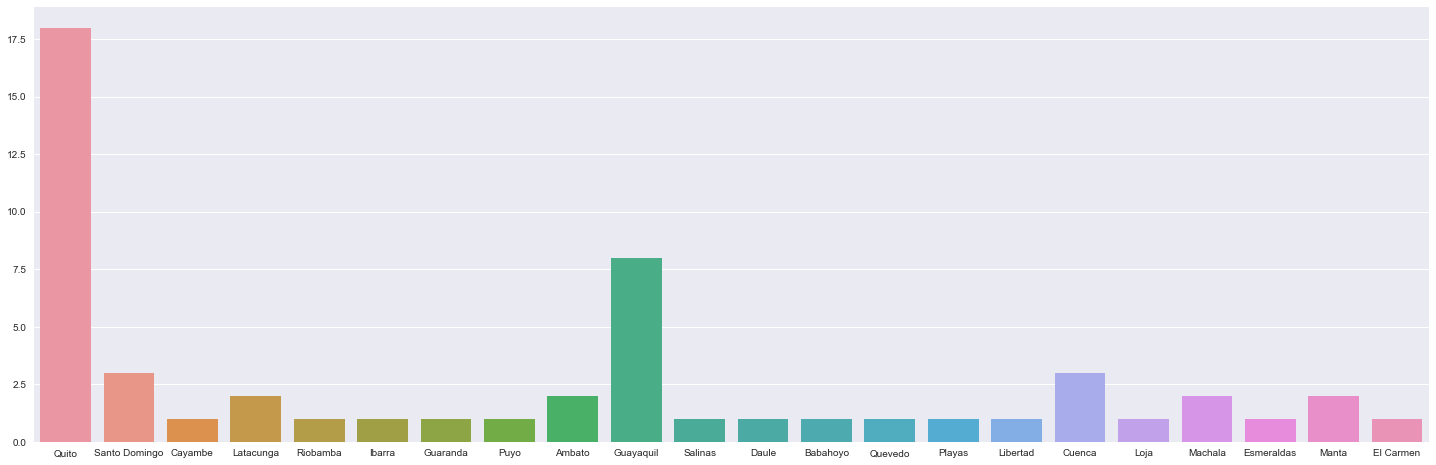

In [69]:
# stores.city.values
# stores.city.value_counts().get_values()
fig, ax = plt.subplots(figsize=(25,8))
sns.barplot(x=stores.city.values,y=stores.num_stores_in_city.values, ax=ax)

In [60]:
store_density = []
for i in range(len(stores)):
    store_density.append(stores.city.value_counts()[stores.iloc[i,:].city])
print(store_density)

[18, 18, 18, 18, 3, 18, 18, 18, 18, 18, 1, 2, 2, 1, 1, 3, 18, 18, 1, 18, 3, 1, 2, 8, 1, 8, 1, 8, 8, 8, 1, 8, 1, 8, 1, 1, 3, 1, 3, 2, 2, 3, 1, 18, 18, 18, 18, 18, 18, 2, 8, 2, 2, 1]


In [61]:
stores = stores.assign(num_stores_in_city=store_density)
# stores = stores.drop('store_density',axis=1)
stores.head()

,store_nbr,city,state,type,cluster,num_stores_in_city
0,1,Quito,Pichincha,D,13,18
1,2,Quito,Pichincha,D,13,18
2,3,Quito,Pichincha,D,8,18
3,4,Quito,Pichincha,D,9,18
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4,3


In [73]:
stores.to_csv(path_or_buf="/Users/brendan/Desktop/Corporación Favorita Grocery Sales Forecasting/stores_ext.csv", index=False)

In [74]:
holidays_events = pd.read_csv("holidays_events.csv")
print(holidays_events.shape)
holidays_events.head()

(350, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [76]:
items = pd.read_csv("items.csv", dtype={"item_nbr": int, "family": str, "class": int, "perishable": int})
print(items.shape)
items.head()

(4100, 4)


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [ ]:
oil = pd.read_csv("oil.csv", parse_dates=['date'])
print(oil.shape)
oil.head()

In [ ]:
transactions = pd.read_csv("transactions.csv", parse_dates=['date'])
print(transactions.shape)
transactions.head()

In [ ]:
test = pd.read_csv("test.csv", parse_dates=['date'])
print(test.shape)
test.head()

In [3]:
train = pd.read_csv("train_weekdays.csv", dtype={"id": int, "date": str, "store_nbr": int, "item_nbr": int, "unit_sales": float, "onpromotion": bool, "weekday": int}, parse_dates=['date'])
print(train.shape)
train.head()

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(125497040, 7)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,weekday
0,0,2013-01-01,25,103665,7.0,NaN,1
1,1,2013-01-01,25,105574,1.0,NaN,1
2,2,2013-01-01,25,105575,2.0,NaN,1
3,3,2013-01-01,25,108079,1.0,NaN,1
4,4,2013-01-01,25,108701,1.0,NaN,1


In [4]:
reg_train = pd.read_feather('reg_train_feather')

In [6]:
reg_train['weekday'] = train['weekday']
reg_train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,weekday
0,0,25,103665,7.0,0,1
1,0,25,105574,1.0,0,1
2,0,25,105575,2.0,0,1
3,0,25,108079,1.0,0,1
4,0,25,108701,1.0,0,1


In [7]:
reg_train.to_feather('./reg_train_wkday_feather')

In [ ]:
train = train.drop('Unnamed: 0', axis=1)
train.head()

In [ ]:
train.shape

In [ ]:
df_plot = train.groupby(by=['date']).agg({'unit_sales':'sum'}).reset_index()
df_plot.head()

In [ ]:
plt.plot(df_plot.date,df_plot.unit_sales)

### Add Weekdays Column

In [ ]:
train.iloc[0].date.weekday()
weekdays = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}
len(train)
train.iloc[0]
day_sales = pd.Series([10,5,2], index=['Mon','Tues','Wed'])
train_days = []
for i in range(len(train)):
    train_days.append(train.date[i].weekday())
    if(i % 10000 == 0):
        print(i)
    
train.head()

In [ ]:
train['weekday'] = train_days

In [ ]:
# Write dataset
train.to_csv(path_or_buf="/Users/brendan/Desktop/Corporación Favorita Grocery Sales Forecasting/train_weekdays.csv", index=False)

### On which weekdays do people buy the most?

In [ ]:
train_2013 = train[train.date < "2014-01-01"]
train_2013.head()

In [ ]:
sales_by_weekday_2013 = train_2013.groupby('weekday').agg({'unit_sales':'sum'})
sales_by_weekday_2013.head(10)

In [ ]:
train_2014 = train[(train.date < "2015-01-01") & (train.date >= "2014-01-01")]
train_2014.head()

In [ ]:
sales_by_weekday_2014 = train_2014.groupby('weekday').agg({'unit_sales':'sum'})
sales_by_weekday_2014.head(10)

In [ ]:
sales_by_weekday_2013.plot(kind='bar')

In [ ]:
sales_by_weekday_2014.plot(kind='bar')

In [ ]:
sales_by_weekday = train.groupby('weekday').agg({'unit_sales':'sum'})
sales_by_weekday.plot(kind='bar')

Looks like people tend to purchase most of their groceries on the weekend, especially Sundays.

### What kind of items do people tend to buy?

In [ ]:
sales_by_item_2013 = train_2013.groupby('item_nbr').agg({'unit_sales':'sum'})
sales_by_item_2013.head()

In [ ]:
item_names = []
for i in range(len(sales_by_item_2013)):
    item_names.append(items[items.item_nbr == sales_by_item_2013.item_nbr[i]].family.values[0])
print(item_names)

In [ ]:
sales_by_item_2013['item_type']=item_names

In [ ]:
sales_by_item_2013.head()

In [ ]:
sales_by_item_2013.plot(x='item_nbr')

In [ ]:
sales_by_item_2013['item_nbr'] = sales_by_item_2013.index
sales_by_item_2013.index = range(len(sales_by_item_2013))

In [ ]:
sales_by_item_2013.head()

In [ ]:
sales_by_item_2013[sales_by_item_2013.unit_sales==sales_by_item_2013.unit_sales.max()]

In [ ]:
sales_by_item_type_2013 = sales_by_item_2013.groupby('item_type').agg({'unit_sales':'sum'})
sales_by_item_type_2013.sort_values('unit_sales', ascending=False)

### Which Stores sell the most product?

In [ ]:
trans_by_store = transactions.groupby(by='store_nbr').agg({'transactions':'sum'})
# trans_by_store.plot(kind='bar', x='store_nbr', y='transactions', figsize=(15,5))
trans_by_store.plot(kind='bar', figsize=(15,5))

In [ ]:
sales_by_store_2013 = train_2013.groupby('store_nbr').agg({'unit_sales':'sum'})
sales_by_store_2013.head()

In [ ]:
sales_by_store_2013['store_nbr'] = sales_by_store_2013.index
sales_by_store_2013.index = range(len(sales_by_store_2013))
sales_by_store_2013.head()

In [ ]:
sales_by_store_2013.plot(kind="bar", x='store_nbr', figsize=(15,5))

In [ ]:
stores[stores.store_nbr==44].city

In [ ]:
items[items.item_nbr == sales_by_item_2013.item_nbr[3]].item_nbr.values[0]

In [ ]:
sales_by_item_2013.index

In [ ]:
items[items.item_nbr == sales_by_item_2013.item_nbr[1]].family.values[0]

### How does OnPromotion affect sales?

In [ ]:
train_2014[train_2014.onpromotion==True].head()

In [ ]:
train_2014_ext = train_2014.merge(items, on='item_nbr', how='inner')

In [ ]:
train_2014_ext.head()

In [ ]:
t14e_onp = train_2014_ext[train_2014_ext.onpromotion==True]
t14e_onp.head()

In [ ]:
t14eonp_byitems = t14e_onp.groupby('item_nbr').agg({'unit_sales':'sum'})
t14eonp_byitems.head()

In [ ]:
t14eonp_byitems.nlargest(10, 'unit_sales')

In [ ]:
t14enotonp_byitems = train_2014[train_2014.onpromotion==False].groupby('item_nbr').agg({'unit_sales':'sum'})
t14enotonp_byitems.nlargest(10, 'unit_sales')

In [ ]:
most_sold_onp = t14e_onp[t14e_onp.item_nbr==t14eonp_byitems.unit_sales.idxmax()]
most_sold_onp.head()

In [ ]:
most_sold_onp.shape

In [ ]:
most_sold_not_onp = train_2014_ext[train_2014_ext.item_nbr==t14eonp_byitems.unit_sales.idxmax()]
most_sold_not_onp.nlargest(10, 'unit_sales')

In [ ]:
most_sold_onp.unit_sales.describe()

In [ ]:
most_sold_not_onp.unit_sales.describe()

In [ ]:
most_sold_onp.plot(x='date',y='unit_sales')

In [ ]:
most_sold_not_onp.plot(x='date',y='unit_sales')

In [ ]:
train_2014_ext.head()

In [ ]:
train_2014_ext[train_2014_ext.item_nbr==96995].describe()

### Most popular product by store/city/state?

In [ ]:
store_44 = train[train.store_nbr==44]
store_44.head()

In [ ]:
store_44.groupby('item_nbr').agg({'unit_sales':'sum'}).nlargest(10, 'unit_sales')

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = [1,2,3,4,5]
ys = [1,2,3]
zs = [25.03067,25.028,25.026,25.0167,25.02,25.016,25.0063,25.0127,25.0093,25.012,25.0193,25.014,24.9973,25.006,25.0003]
ax.scatter(xs, ys, zs=zs)

In [ ]:
sns.lmplot